In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import matplotlib.font_manager as fm

import os
import urllib.request


In [3]:
sns.set_theme(font="Arial", font_scale=1.5)

In [4]:
# Set transparent background but keep horizontal grid lines
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['savefig.transparent'] = False
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['axes.grid.axis'] = 'y'
plt.rcParams['grid.linestyle'] = '-'
plt.rcParams['grid.color'] = 'black'
plt.rcParams['grid.alpha'] = 0.2
plt.rcParams['axes.linewidth'] = 1.0
plt.rcParams['axes.edgecolor'] = 'white'

In [5]:
res = pd.read_csv('data/omni.tsv', sep="\t")
res

,model,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only,celltype
0,GENIE3,kidney distal convoluted tubule epithelial cell,5.850000,0.002520,0.001060,14.700000,True,True,False
1,GENIE3,kidney distal convoluted tubule epithelial cell,1.750000,0.001080,0.001060,2.900000,False,False,True
2,GENIE3,kidney loop of Henle thick ascending limb epit...,4.900000,0.003310,0.001210,10.000000,True,True,True
3,GENIE3,kidney loop of Henle thick ascending limb epit...,0.720000,0.001200,0.001210,2.500000,False,False,True
4,GENIE3,kidney collecting duct principal cell,8.780000,0.004760,0.001360,1.400000,True,True,True
...,...,...,...,...,...,...,...,...,...
340,DeepSEM,pericyte,12.300303,0.003588,0.000973,7.142857,False,True,False
341,DeepSEM,lymphocyte,1.646862,0.001077,0.001057,3.225806,False,False,False
342,DeepSEM,lymphocyte,7.784547,0.003484,0.001057,6.451613,False,True,False
343,DeepSEM,stromal cell,0.920890,0.001148,0.001162,0.000000,True,False,False


In [50]:
L1 = [
    "kidney distal convoluted tubule epithelial cell",
    "kidney loop of Henle thick ascending limb epithelial cell",
    "kidney collecting duct principal cell",
    "mesangial cell",   
    "blood vessel smooth muscle cell",
    "podocyte",
    "macrophage",
    "leukocyte",
    "kidney interstitial fibroblast",
]

L2 = [
    "fibroblast",
    "endothelial cell",
    "myofibroblast cell",
    "glial cell",
    "pericyte",
    "lymphocyte",
    "stromal cell",
]

L3 = [
    "retinal rod cell",
    "Mueller cell",
    "amacrine cell",
    "ON-bipolar cell",
    "rod bipolar cell",
    "retinal cone cell",
    "retina horizontal cell",
    "retinal ganglion cell",
    "astrocyte",
    "microglial cell",
]

In [51]:
#res = res[res.name != "endothelial cell"].iloc[:79] # first dataset
res = res[res.name.isin(L3)]
#res.iloc[298, 2] = 19.

In [45]:
res['TF_only'] = res['TF_only'].replace({True: 'TF-gene only', False: "All"})
#res['model'] = res['model'].replace({"scPRINT-class": "scPRINT-omni"})
res = res.rename(columns={'TF_only': 'Format'})
res = res.sort_values(by="model")

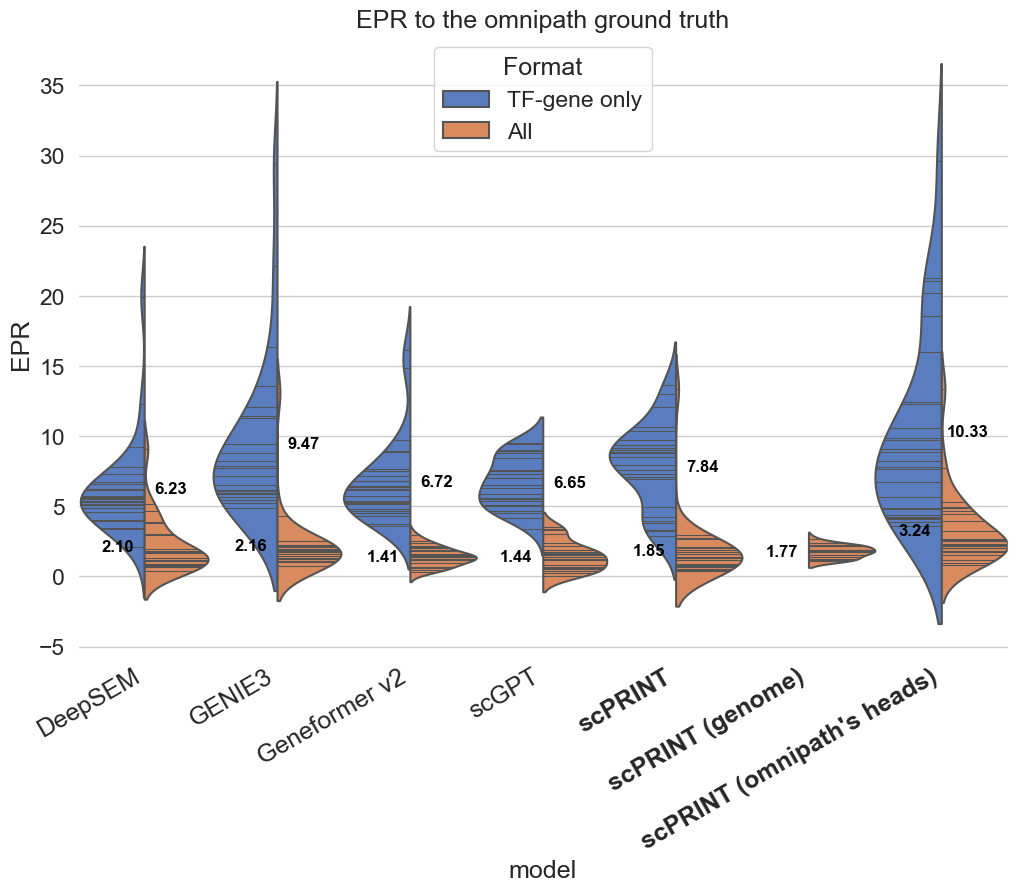

In [34]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='model', y='EPR', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['EPR'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc + offset, mean_values['EPR'][i], f"{mean_values['EPR'][i]:.2f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Set the title and labels of the plot
violin_plot.set_title('EPR to the omnipath ground truth')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('EPR')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)


# Show the plot
plt.savefig('violin_epr.svg', bbox_inches='tight')
plt.show()



In [30]:
res['AUPRC'] = res['AUPRC'] + res['RAND']

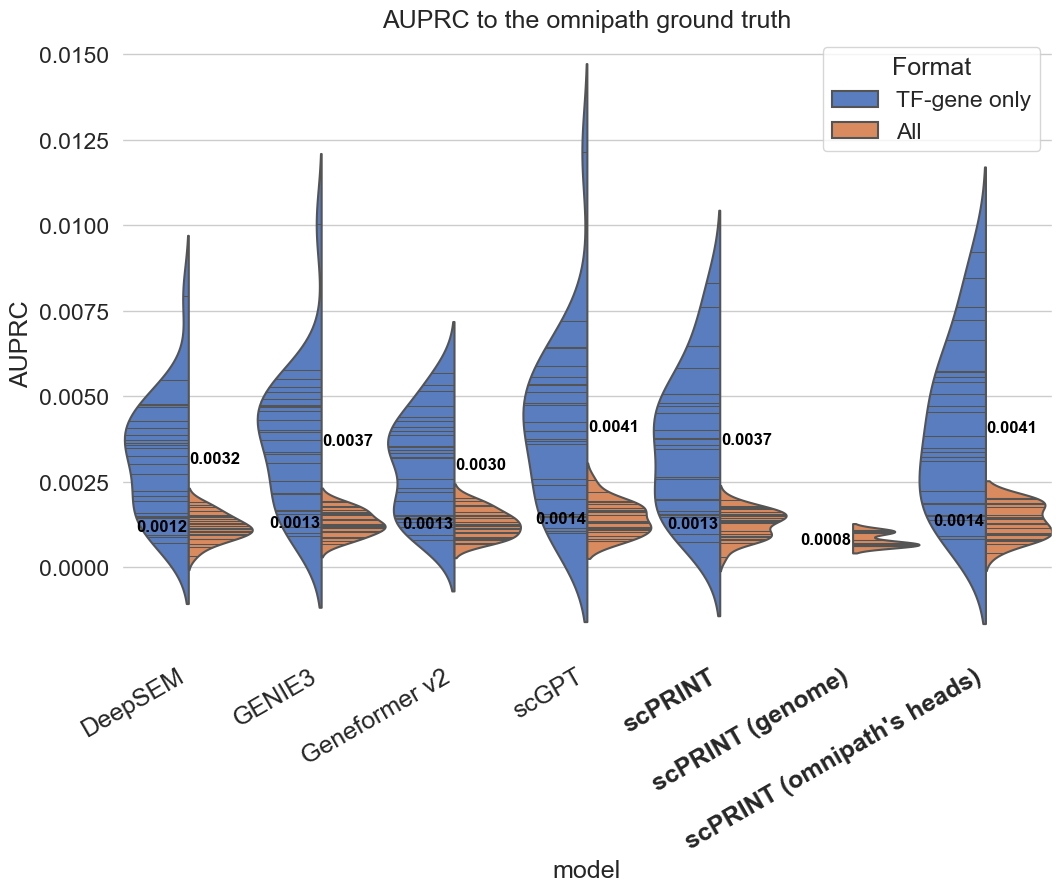

In [35]:
# Set the aesthetic style of the plots

# Create the violin plot with adjusted scale to fix the tiny side issue
plt.figure(figsize=(12, 8))
violin_plot = sns.violinplot(x='model', y='AUPRC', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['AUPRC'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc + offset, mean_values['AUPRC'][i], f"{mean_values['AUPRC'][i]:.4f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')
# Set the title and labels of the plot
violin_plot.set_title('AUPRC to the omnipath ground truth')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability and align them
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)


# Show the plot
plt.savefig('violin_auprc.svg', bbox_inches='tight')
plt.show()


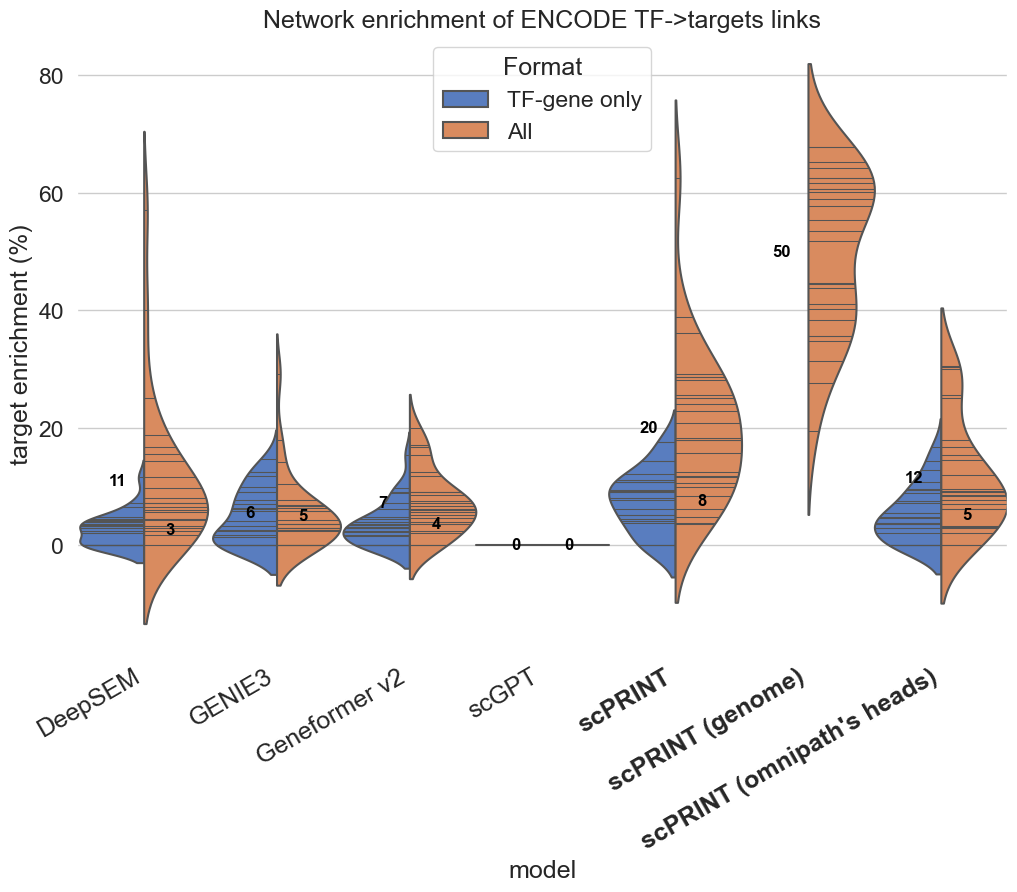

In [36]:
# Create the violin plot
plt.figure(figsize=(12, 8))

violin_plot = sns.violinplot(x='model', y='TF_targ', hue="Format", data=res, split=True, density_norm='count', width=1, linewidth=1.5, palette="muted", inner='stick')

# Set the title and labels of the plot
violin_plot.set_title('Network enrichment of ENCODE TF->targets links')
violin_plot.set_xlabel('model')
violin_plot.set_ylabel('target enrichment (%)')
# Add the mean value as text
mean_values = res.groupby(['model', 'Format'])['TF_targ'].mean().reindex(res['model'].unique(), level=0).reset_index()

for i in range(mean_values.shape[0]):
    offset = 0.2 if mean_values['Format'][i] == 'TF-gene only' else -0.2
    xloc = res['model'].unique().tolist().index(mean_values['model'][i])
    violin_plot.text(xloc+offset, mean_values['TF_targ'][i], f"{mean_values['TF_targ'][i]:.0f}", color='black', ha="center", va="center", fontsize=12, fontweight='bold')

# Rotate the x labels for better readability
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)
# Show the plot
plt.savefig('violin_tf_targ.svg', bbox_inches='tight')
plt.show()

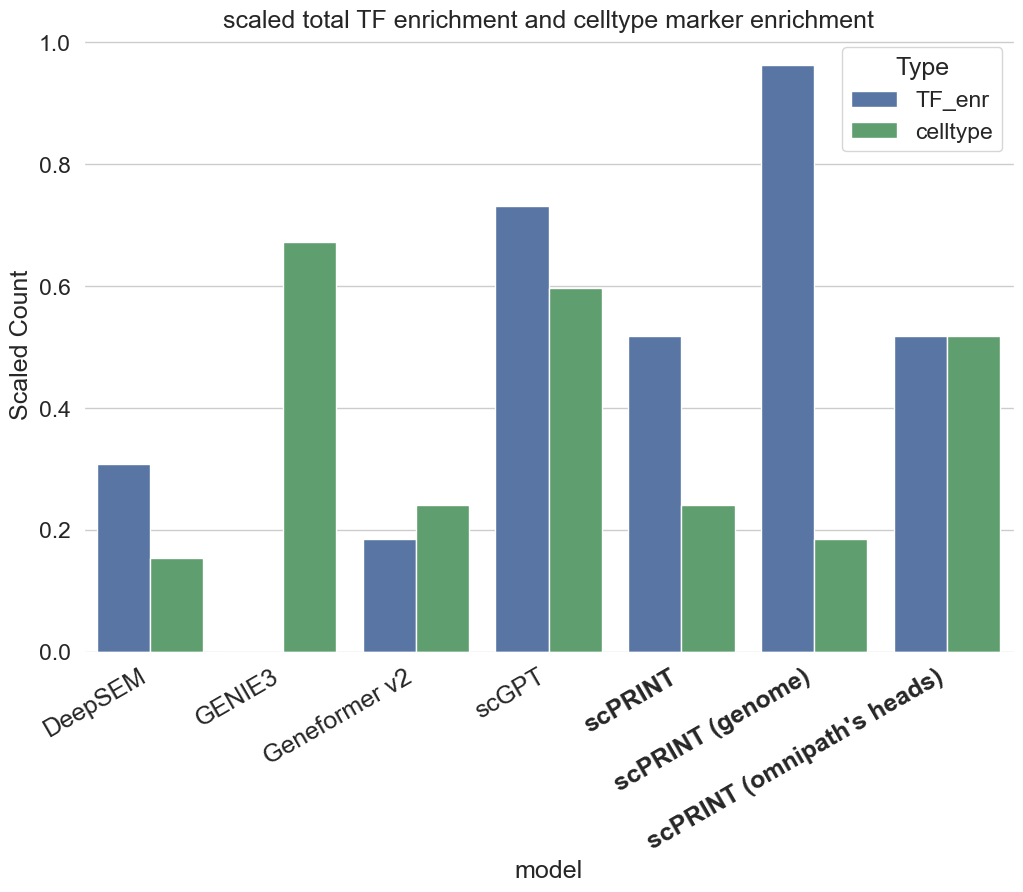

In [46]:
# Count the number of TF_enr and celltype
tf_enr_count = res[(res.Format != 'TF-gene only')].groupby(['model'])['TF_enr'].sum().reset_index()
celltype_count = res.groupby(['model'])['celltype'].sum().reset_index()

# Merge the total count with tf_enr_count and celltype_count
tf_enr_count = tf_enr_count.merge(res[(res.Format != 'TF-gene only')].groupby(['model']).size().reset_index(name='Total'), on='model')
celltype_count = celltype_count.merge(res.groupby(['model']).size().reset_index(name='Total'), on='model')

# Scale the counts by the total number of elements per model
tf_enr_count['Count'] = tf_enr_count['TF_enr'] / tf_enr_count['Total']
celltype_count['Count'] = celltype_count['celltype'] / celltype_count['Total']

# Create a new DataFrame for plotting
tf_enr_count['Type'] = 'TF_enr'
celltype_count['Type'] = 'celltype'
tf_enr_count = tf_enr_count[['model', 'Count', 'Type']]
celltype_count = celltype_count[['model', 'Count', 'Type']]
count_data = pd.concat([tf_enr_count, celltype_count])

# Create the barplot with hue for Type
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='model', y='Count', hue='Type', data=count_data, palette=[sns.color_palette()[0], sns.color_palette()[2]])

# Set the title and labels of the plot
bar_plot.set_title('scaled total TF enrichment and celltype marker enrichment')# counts by model  by total number of elements, excluding TF-gene only format)')
bar_plot.set_xlabel('model')
bar_plot.set_ylabel('Scaled Count')

# Rotate the x labels for better readability
plt.xticks(rotation=30, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)
# Show the plot
plt.savefig('barplot_count.svg', bbox_inches='tight')
plt.show()


In [3]:
res = pd.read_csv('data/sroy.tsv', sep="\t", )
res

,tool,name,EPR,AUPRC,RAND,TF_only
0,GENIE3,Han et. al.,1.440000,0.029200,0.027400,False
1,GENIE3,Han et. al. (ChIP),1.210000,0.276600,0.253700,False
2,GENIE3,Han et. al. (KO),1.120000,0.077500,0.076600,False
3,GENIE3,Yan et. al.,1.090000,0.028600,0.024700,False
4,GENIE3,Tran et. al.,0.970000,0.073700,0.079600,False
5,GENIE3,Tran et. al. (ChIP),0.950000,0.197200,0.198900,False
6,GENIE3,Tran et. al. (KO),0.970000,0.073700,0.079600,False
7,GENIE3,Zhao et. al.,1.060000,0.057900,0.053100,False
8,DeepSEM,Han et. al.,1.588121,0.029599,0.027387,False
9,DeepSEM,Han et. al. (ChIP),0.968292,0.249344,0.253475,False


In [4]:
res['AUPRC'] = res['AUPRC'] - res['RAND']

/tmp/ipykernel_562814/1274852121.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


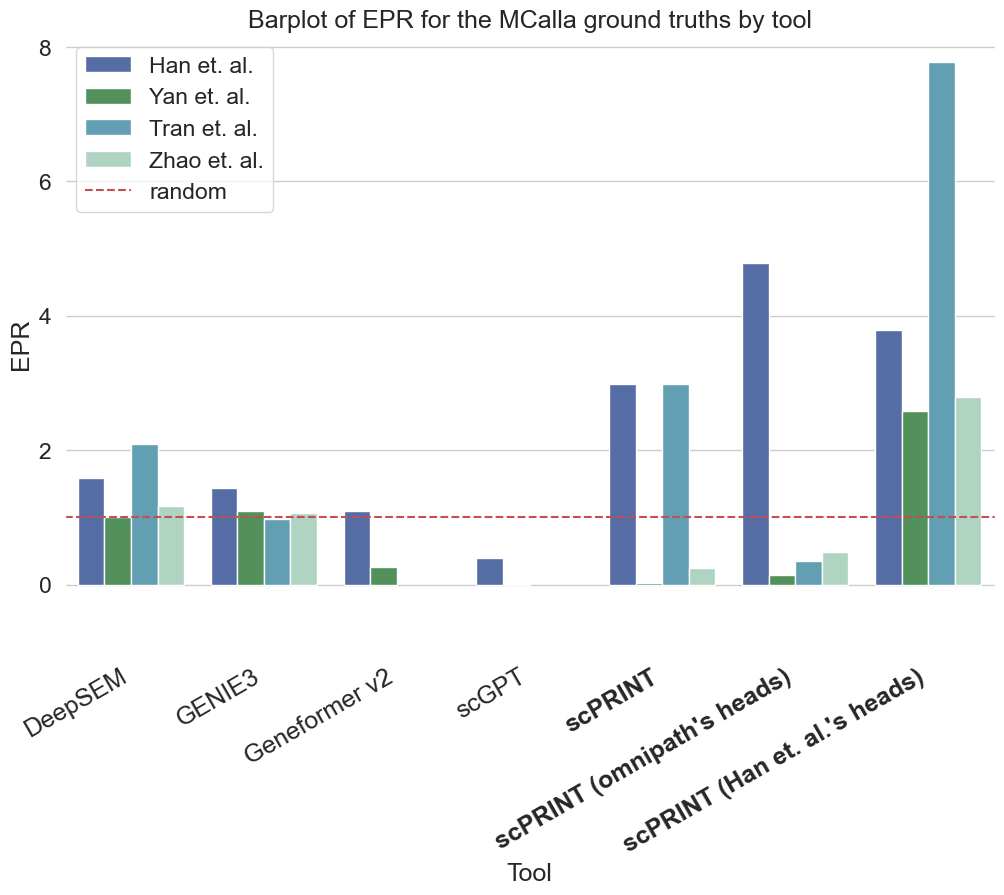

In [10]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='EPR').reset_index()

plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']

# Define tool order
tool_order = ['DeepSEM','GENIE3', 'Geneformer v2', 'scGPT', 'scPRINT', "scPRINT (omnipath's heads)", "scPRINT (Han et. al.'s heads)"]

bar_plot = sns.barplot(x='tool', y='value', hue='dataset', data=filtered_res.melt(id_vars='tool', value_name='value'), 
                      order=tool_order, hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Add the random line at y=1
plt.axhline(y=1, color='r', linestyle='--', label='random')

# Set the title and labels of the plot
bar_plot.set_title('Barplot of EPR for the MCalla ground truths by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('EPR')
bar_plot.set(ylim=(-1, None))

# Rotate the x labels for better readability
plt.xticks(rotation=30, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)

# Show the plot
plt.legend()
plt.savefig('barplot_epr.svg', bbox_inches='tight')
plt.show()


/tmp/ipykernel_562814/2695499125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)


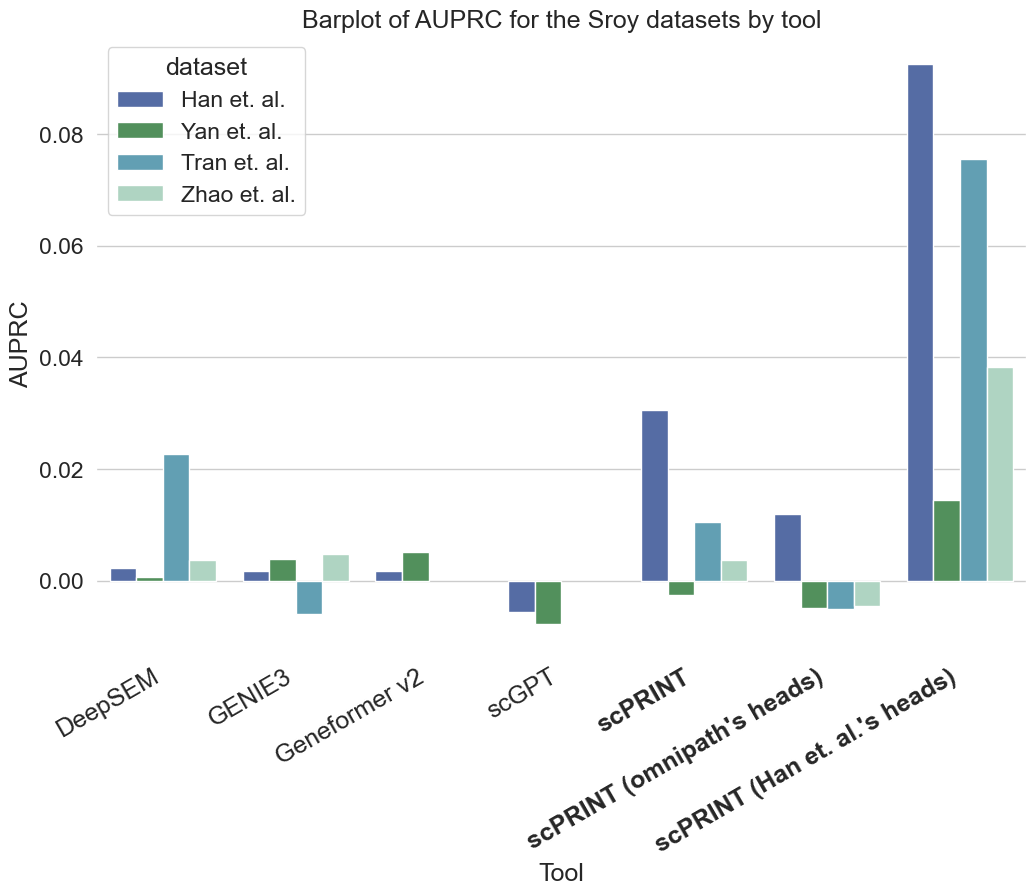

In [11]:
filtered_res = res[~(res['name'].str.contains('ChIP') | res['name'].str.contains('KO'))]

filtered_res['tool'] = filtered_res.apply(lambda row: f"{row['tool']}-TF" if row['TF_only'] else row['tool'], axis=1)
filtered_res = filtered_res.rename(columns={'name': "dataset"})

filtered_res = filtered_res.pivot(index='tool', columns='dataset', values='AUPRC').reset_index()
plt.figure(figsize=(12, 8))
order = ['Han et. al.', 'Yan et. al.', 'Tran et. al.', 'Zhao et. al.']
bar_plot = sns.barplot(x='tool', y='value', hue='dataset',order=tool_order, data=filtered_res.melt(id_vars='tool', value_name='value'), hue_order=order, palette=['#4867B1', '#479B55', '#54A6C1', '#A9DAC2'])

# Set the title and labels of the plot
bar_plot.set_title('Barplot of AUPRC for the Sroy datasets by tool')
bar_plot.set_xlabel('Tool')
bar_plot.set_ylabel('AUPRC')

# Rotate the x labels for better readability
plt.xticks(rotation=30, ha='right')
# Make the first four x labels bold
xticks_labels = plt.gca().get_xticklabels()
for i, label in enumerate(xticks_labels):
    if i > 3:
        label.set_fontweight('bold')
plt.xticks(ticks=plt.gca().get_xticks(), labels=xticks_labels, rotation=30, ha="right", fontsize=18)
# Show the plot
plt.savefig('barplot_auprc.svg', bbox_inches='tight')
plt.show()


In [17]:
res = pd.read_csv('data/ablation_scores.tsv', sep="\t")
res

,id,description,denoise/reco2full_vs_noisy2full,emb_lung/ct_class,emb_lung/scib,emb_panc/ct_class,emb_panc/scib,grn_gwps/auprc,grn_gwps/auprc_omni,grn_gwps/auprc_self,...,grn_omni/tf_enr,grn_omni/tf_enr_class,grn_omni/tf_targ_enr,grn_omni/tf_targ_enr_class,grn_sroy/auprc,grn_sroy/auprc_omni,grn_sroy/auprc_self,grn_sroy/epr,grn_sroy/epr_omni,grn_sroy/epr_self
0,24chcp2e,medium-nofreeze,0.152000,0.45245,0.540570,0.521060,0.532150,0.028780,0.030830,0.037600,...,4.0,6.0,39.94006,12.74848,0.101730,0.099720,0.105390,0.91703,0.793900,1.320040
1,25eer0xz,an-interesting-one,0.074830,0.50634,0.527970,0.368090,0.482550,0.029820,0.029090,0.036030,...,8.0,3.0,14.36356,12.83615,0.096430,0.097920,0.099690,0.89802,0.861510,1.027060
2,3pb76o4g,medium-lognorm,0.166820,0.67238,0.556430,0.340920,0.471610,0.035260,0.035780,0.036280,...,0.0,0.0,10.64455,8.58690,0.093020,0.094330,0.105550,0.95413,0.905260,1.430050
3,5qkqjrxy,medium-network-bias,0.161200,0.59747,0.539870,0.576000,0.503580,0.033320,0.033320,0.035310,...,0.0,1.0,16.13036,6.18852,0.102380,0.101320,0.096640,1.16931,0.938260,0.937630
4,3mku8wkc,medium-2-heads,0.100230,0.48616,0.548170,0.399770,0.528730,0.027400,0.027610,0.030770,...,0.0,0.0,15.23042,4.96568,0.088050,0.090950,0.085740,0.62757,0.690910,0.717880
5,2rf0oi07,medium-network-bias-T,0.108290,0.50957,0.521200,0.458310,0.482410,0.031440,0.033700,0.039500,...,3.0,2.0,16.25680,8.82592,0.110920,0.104960,0.108210,1.81834,1.815320,1.572000
6,ghqf2hym,medium,0.121350,0.58358,0.548020,0.516360,0.507130,0.031830,0.031570,0.034620,...,1.0,1.0,29.93792,21.46700,0.099750,0.088910,0.087550,1.52356,0.725980,0.540470
7,lsr3pvnf,medium-MSE,0.214380,0.61474,0.563830,0.505860,0.490520,0.032730,0.034110,0.038660,...,2.0,0.0,30.13864,30.18775,0.094620,0.098620,0.098630,0.91169,1.217610,1.231390
8,muwj73gx,medium-MVC,0.205040,0.51121,0.548450,0.397080,0.473090,0.037380,0.036500,0.040080,...,2.0,0.0,8.23687,5.11390,0.103000,0.103000,0.095900,1.05089,1.050890,0.777240
9,n8jypo8z,medium-noPE,0.094620,0.70798,0.557180,0.345380,0.460530,0.038810,0.038720,0.039390,...,1.0,2.0,40.83405,34.53823,0.097420,0.097290,0.098760,0.78716,0.722490,0.968530


In [13]:
# Pivot the table to have 'id' and 'description' as rows and 'label' values as columns
pivoted_res = res.pivot(index=['id', 'description'], columns='label', values='score').reset_index()

# Display the pivoted table
pivoted_res.to_csv("data/ablation_scores.tsv",sep="\t", index=False)



# denoising plot

In [7]:
res = pd.read_csv('data/denoising.tsv', sep="\t")
res

,tools,denoising (+%) correlation. gNNpgpo6gATjuxTE7CCp,denoising (+%) correlation. R4ZHoQegxXdSFNFY5LGe,denoising (+%) correlation (REIyQZE6OMZm1S3W2Dxi),denoising (+%) correlation (low cell count: 30). gNNpgpo6gATjuxTE7CCp,denoising (+%) correlation (low cell count: 30). R4ZHoQegxXdSFNFY5LGe,denoising (+%) correlation (low cell count: 30) (REIyQZE6OMZm1S3W2Dxi),denoising (+%) correlation,denoising (+%) correlation (low cell count: 30)
0,random model,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0,-16.0
1,scPRINT-large (random expr),25.8,32.0,30.1,X,X,X,29.3,X
2,scPRINT-large + KNN,21.9,34.6,21.0,X,X,X,25.8,X
3,scPRINT-large,19.1,33.9,17.1,22.5,26.6,16.6,23.4,21.9
4,KNNsmoothing2,21.0,34.9,21.6,17.0,32.0,13.4,25.8,20.8
5,magic,29.3,37.7,22.7,16.8,24.4,4.6,29.9,15.3
6,magic (low cell dataset),X,X,X,11.3,14.0,13.0,X,12.8


In [1]:

import numpy as np

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

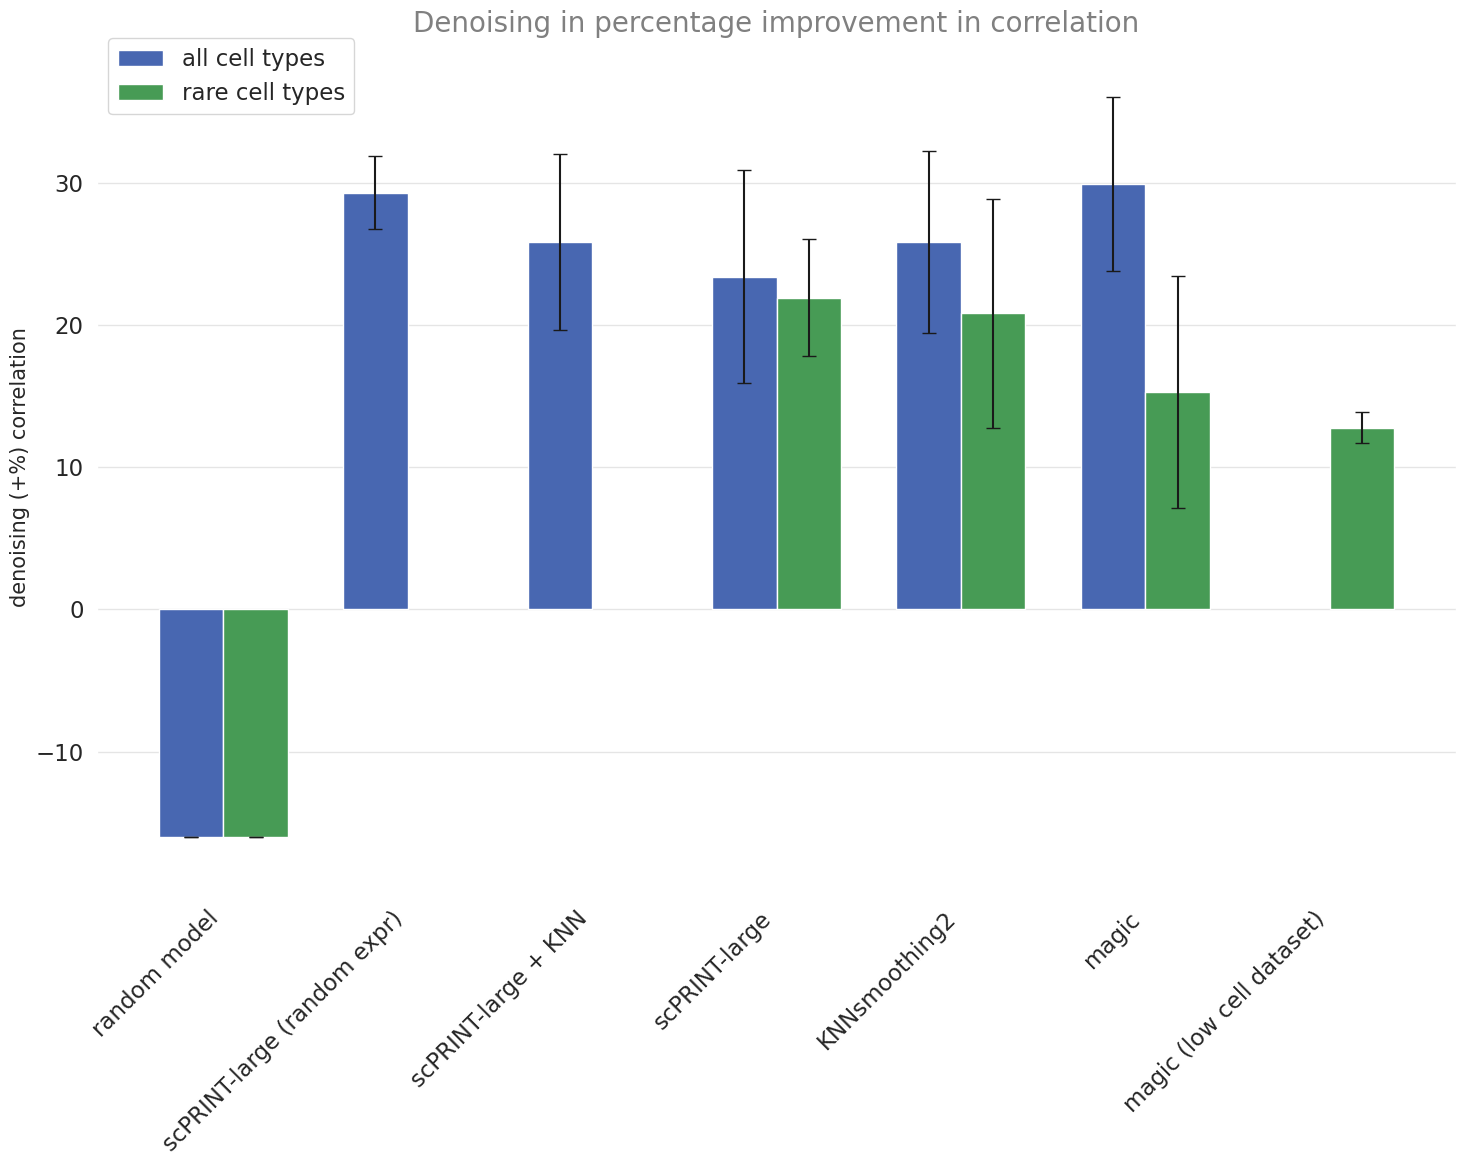

In [22]:
# Create a figure with a larger size
plt.figure(figsize=(15, 12))

# Extract the relevant columns for plotting
tools = res['tools']

# Get high and low cell count columns
high_cell_cols = [col for col in res.columns if 'denoising' in col and 'low cell count' not in col]
low_cell_cols = [col for col in res.columns if 'denoising' in col and 'low cell count' in col]

# Calculate means for high and low cell counts
high_means = res[high_cell_cols].replace('X', np.nan).astype(float).mean(axis=1)
low_means = res[low_cell_cols].replace('X', np.nan).astype(float).mean(axis=1)

# Calculate standard deviations
high_stds = res[high_cell_cols].replace('X', np.nan).astype(float).std(axis=1)
low_stds = res[low_cell_cols].replace('X', np.nan).astype(float).std(axis=1)

# Set the positions of the bars
x = np.arange(len(tools))
width = 0.35

# Create bars
plt.bar(x - width/2, high_means, width, yerr=high_stds, capsize=5, label='all cell types', color='#4867B1')
plt.bar(x + width/2, low_means, width, yerr=low_stds, capsize=5, label='rare cell types', color='#479B55')

# Customize the plot
plt.title('Denoising in percentage improvement in correlation', fontsize=20, color='gray')
plt.xlabel('')
plt.ylabel('denoising (+%) correlation', fontsize=15)

# Set x-axis ticks and labels
plt.xticks(x, tools, rotation=45, ha='right')

# Add grid and legend
# Add grid
plt.grid(axis='y', linestyle='-', alpha=0.2, color='gray')

# Customize y-axis
plt.ylim(-20, 40)
plt.yticks(np.arange(-10, 31, 10))

# Add legend at top
plt.legend(bbox_to_anchor=(0, 0.9, 1, 0.2), loc="lower left", ncol=1)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Save the plot
plt.savefig('denoising_performance.svg', bbox_inches='tight')
plt.show()
